## Task 7

### Prediction using Supervised Machine Learning using Simple Linear Regression

**In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables.**

**y = ax+b where as x = "Hours", y = "Scores"**

### Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="white")

### Load the Dataset

In [2]:
df = pd.read_csv("dataset/StudentHoursScores.csv")
df.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


### Understanding the Dataset

In [3]:
df.shape

(23, 2)

In [4]:
df.size

46

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.nunique()

Hours     22
Scores    22
dtype: int64

In [8]:
df.memory_usage()

Index     128
Hours     184
Scores    184
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [11]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

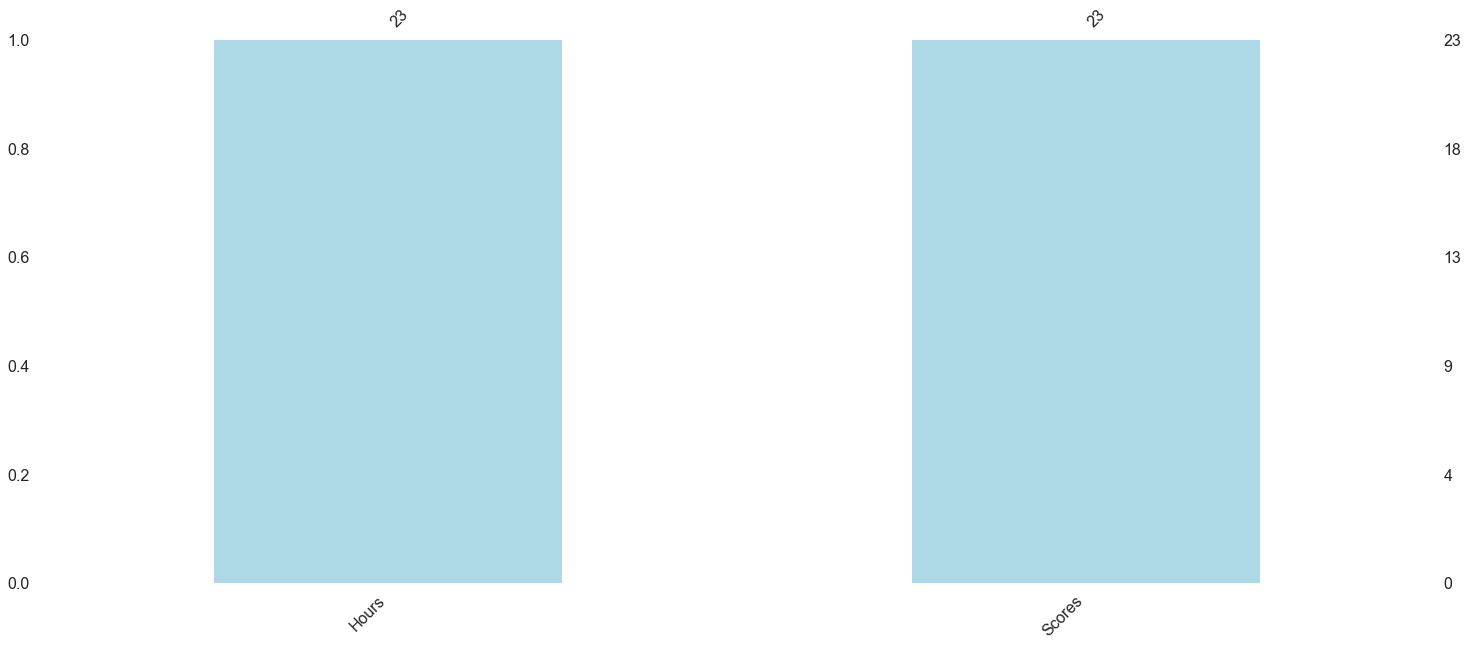

In [12]:
import missingno as msno

msno.bar(df, color="lightblue")
plt.show()

### Data Visualization

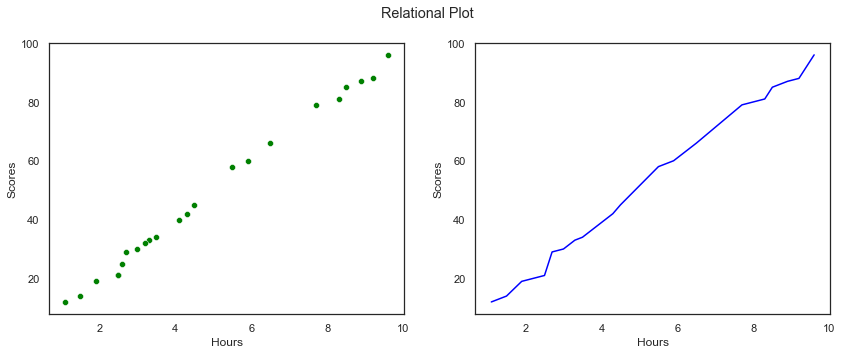

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=df.Hours, y=df.Scores, color="green", ax=axes[0])
sns.lineplot(x=df.Hours, y=df.Scores, color="blue", ax=axes[1])
plt.suptitle("Relational Plot")
plt.show()

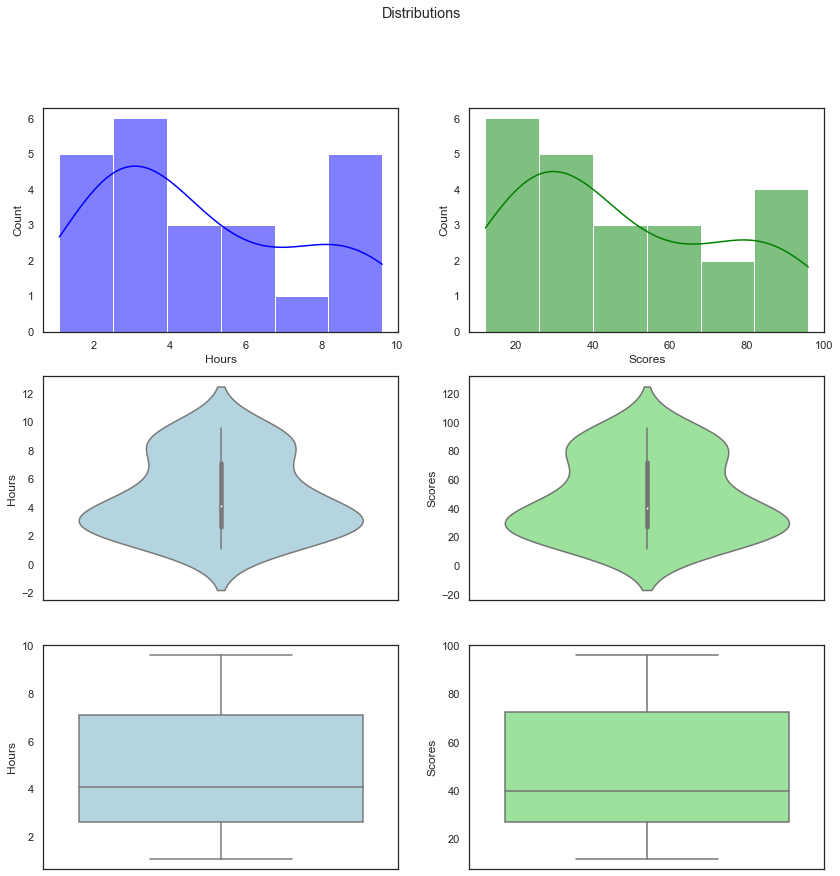

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
sns.histplot(x=df.Hours, ax=axes[0][0], kde=True, color="blue")
sns.histplot(x=df.Scores, ax=axes[0][1], kde=True, color="green")
sns.violinplot(y=df.Hours, ax=axes[1][0], color="lightblue")
sns.violinplot(y=df.Scores, ax=axes[1][1], color="lightgreen")
sns.boxplot(y=df.Hours, ax=axes[2][0], color="lightblue")
sns.boxplot(y=df.Scores, ax=axes[2][1], color="lightgreen")
plt.suptitle("Distributions")
plt.show()

### Covariation

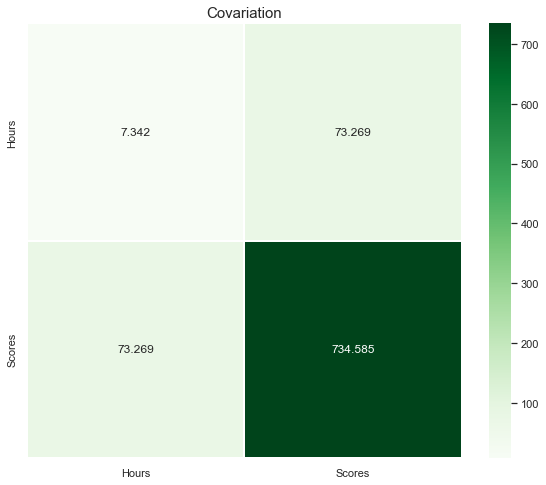

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.cov(), annot=True, fmt=".3f", linewidths=2, square=True, cmap="Greens")
plt.title("Covariation", size=15)
plt.show()

### Correlation

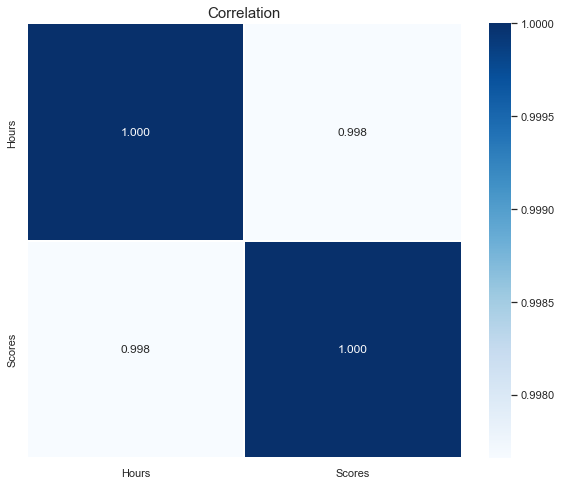

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidths=2, square=True, cmap="Blues")
plt.title("Correlation", size=15)
plt.show()

### Data Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from yellowbrick.target import BalancedBinningReference
from yellowbrick.regressor import ResidualsPlot, prediction_error

In [18]:
X = df.drop(["Scores"], axis=1)
y = df["Scores"]

In [19]:
X[:5]

,Hours
0,7.7
1,5.9
2,4.5
3,3.3
4,1.1


In [20]:
y[:5]

0    79
1    60
2    45
3    33
4    12
Name: Scores, dtype: int64

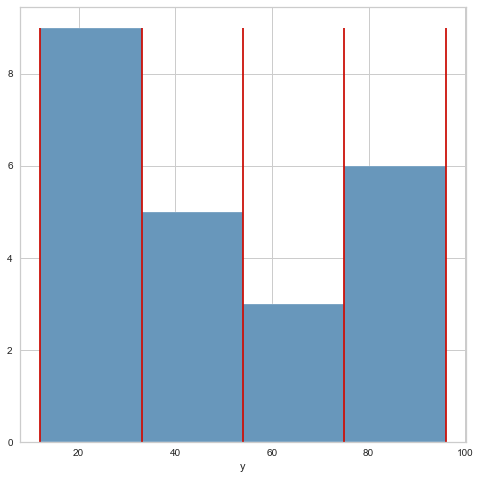

In [21]:
plt.figure(figsize=(8, 8))
visualizer = BalancedBinningReference()
visualizer.fit(y)
visualizer.show()
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.metrics import (
    mean_squared_log_error,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
)
from sklearn.model_selection import cross_val_score

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr_reg.predict(X_test)
y_pred[:5]

array([31.59205411, 82.29863163, 76.33315192, 26.62082102, 24.63232779])

In [26]:
lr_reg.coef_

array([9.94246618])

In [27]:
lr_reg.intercept_

-0.22383766132794136

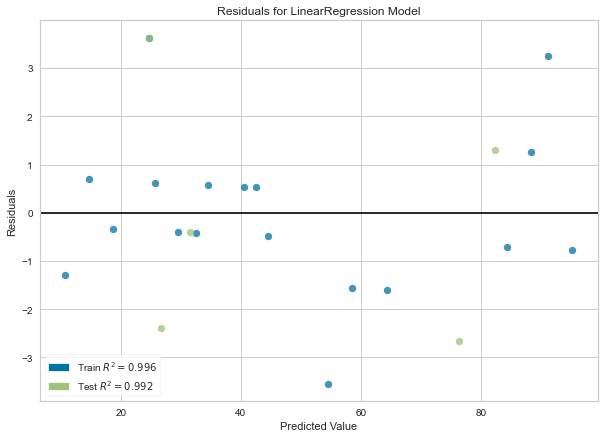

In [28]:
plt.figure(figsize=(10, 7))
visualizer = ResidualsPlot(lr_reg, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

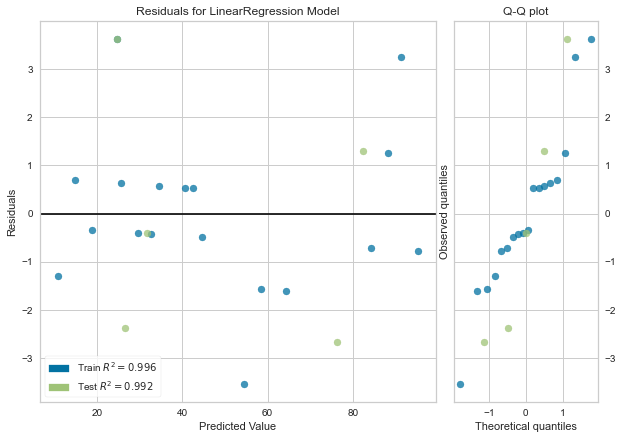

In [29]:
plt.figure(figsize=(10, 7))
visualizer = ResidualsPlot(lr_reg, qqplot=True, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

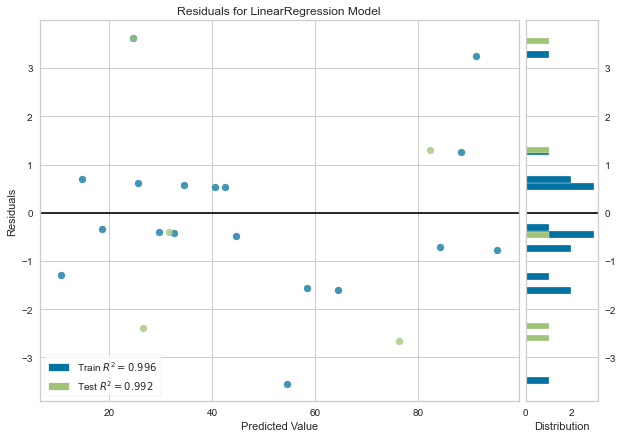

In [30]:
plt.figure(figsize=(10, 7))
visualizer = ResidualsPlot(lr_reg, qqplot=False, hist=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

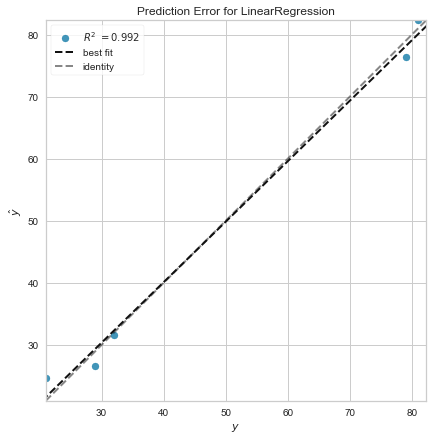

In [31]:
plt.figure(figsize=(10, 7))
visualizer = prediction_error(lr_reg, X_train, y_train, X_test, y_test)
visualizer.show()
plt.show()

In [32]:
accuracies = cross_val_score(lr_reg, X_train, y_train)
print(accuracies)

[0.9983394  0.99054637 0.99816853 0.98342942 0.99149409]


In [33]:
print("MSE      : %0.2f " % mean_squared_error(y_test, y_pred))
print("MAE      : %0.2f " % mean_absolute_error(y_test, y_pred))
print("RMSE     : %0.2f " % mean_squared_error(y_test, y_pred) ** 0.5)
print("R2       : %0.2f " % r2_score(y_test, y_pred))
print("Score    : %0.2f " % accuracies.mean())

MSE      : 5.56 
MAE      : 2.08 
RMSE     : 2.36 
R2       : 0.99 
Score    : 0.99 
